In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = [pd.read_csv(f"data/csv/{i}.csv") for i in range(1, 9)]

In [3]:
def ith_year(odd, even, i):
    odd = odd.drop(odd.index[odd['SGPA'] == 0])
    even = even.drop(even.index[even['SGPA'] == 0])
    even = even.drop(even.index[~even['Roll number'].apply(lambda x: x.startswith(str(2024 - i)))])
    odd = odd.drop(odd.index[~odd['Roll number'].apply(lambda x: x.startswith(str(2024 - i)))])
    even['Branch code'] = even['Roll number'].apply(lambda x: x[5:7])
    even['Roll number'] = even['Roll number'].apply(lambda x: x[-4:])
    odd['Roll number'] = odd['Roll number'].apply(lambda x: x[-4:])
    ith_year = pd.merge(odd, even, on='Roll number', how='inner', suffixes=((i * 2) - 1, i * 2))
    ith_year['Year'] = i
    return ith_year.drop('Roll number', axis=1)

In [4]:
def prepare_years(df):
    years = []
    j = 1
    for i in range(1, 9, 2):
        years.append(ith_year(df[i - 1], df[i], j))
        j += 1
    return years

In [5]:
years = prepare_years(df)
btech = pd.concat(years)
btech.head()

,SGPA1,SGPA2,Branch code,Year,SGPA3,SGPA4,SGPA5,SGPA6,SGPA7,SGPA8
0,5.0,5.50,BT,1,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,5.83,ME,1,NaN,NaN,NaN,NaN,NaN,NaN
2,8.4,8.00,ME,1,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.67,BT,1,NaN,NaN,NaN,NaN,NaN,NaN
4,6.6,7.17,BT,1,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def statistics_per_year(year, i):
    correlation_coefficient = year[f"SGPA{(2 * (i + 1)) - 1}"].corr(year[f"SGPA{2 * (i + 1)}"])
    print("Correlation coefficient of year {} is: ".format(i + 1), correlation_coefficient)
for i in range(len(years)):
    statistics_per_year(years[i], i)

Correlation coefficient of year 1 is:  0.8105539176671066
Correlation coefficient of year 2 is:  0.8421919601080878
Correlation coefficient of year 3 is:  0.8263217283390054
Correlation coefficient of year 4 is:  0.5735630434716703


In [7]:
def plot_years(years):
    fig, axs = plt.subplots(2, 2, figsize=(14, 7))
    for i, ax in enumerate(axs.flat):
        ith_year = years[i]
        ax.scatter(ith_year[f"SGPA{(2 * (i + 1)) - 1}"], ith_year[f"SGPA{2 * (i + 1)}"], s=5)
        # ax.set_xticks(np.arange(0, 11, 0.5))
        # ax.set_yticks(np.arange(0, 11, 0.5))
        ax.set_title(f"Year {i + 1}")
    plt.tight_layout()
    plt.show()

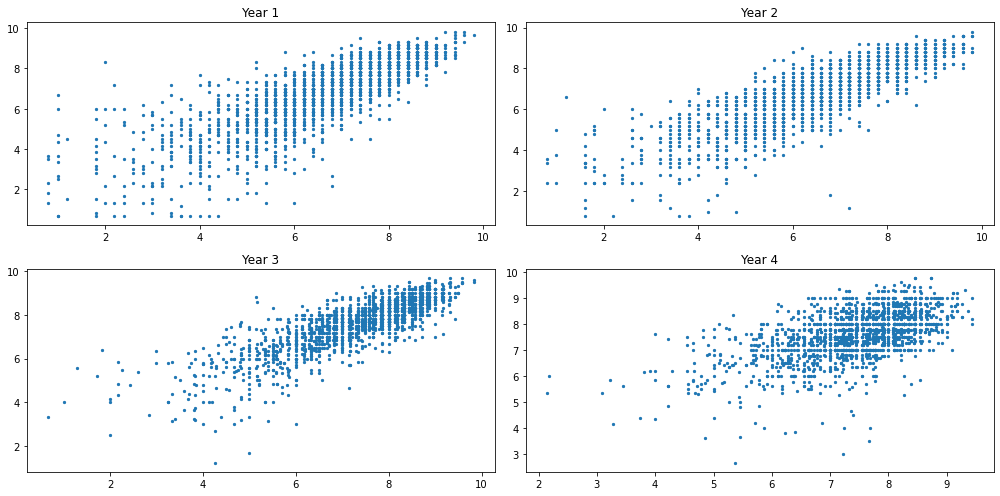

In [8]:
plot_years(years)